In [6]:
# Random Forest Classification for Mice Protein Expression Dataset

# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns




In [7]:
# Step 2: Load the dataset (assuming the file was saved as CSV)
df = pd.read_excel("Data_Cortex_Nuclear.xls")



In [8]:
# Step 3: Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
df[df.columns[1:78]] = imputer.fit_transform(df[df.columns[1:78]])



In [9]:
# Step 4: Encode the target class
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])


In [10]:

# Step 5: Prepare features and labels
X = df.iloc[:, 1:78]  # Protein expression levels
y = df['class']       # 8 classes of mice



In [11]:
# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Step 7: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [13]:
# Step 8: Make predictions
y_pred = rf_model.predict(X_test)



In [14]:
# Step 9: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Accuracy: 0.9907407407407407
              precision    recall  f1-score   support

      c-CS-m       0.97      1.00      0.98        32
      c-CS-s       1.00      0.96      0.98        26
      c-SC-m       1.00      0.96      0.98        27
      c-SC-s       0.97      1.00      0.99        34
      t-CS-m       1.00      1.00      1.00        19
      t-CS-s       1.00      1.00      1.00        22
      t-SC-m       1.00      1.00      1.00        25
      t-SC-s       1.00      1.00      1.00        31

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



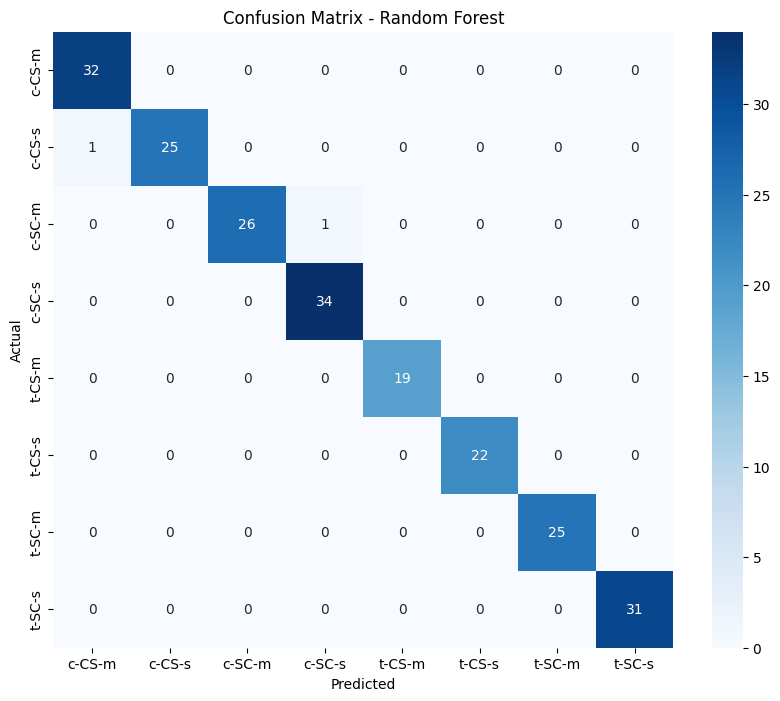

In [15]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()



<Figure size 1200x600 with 0 Axes>

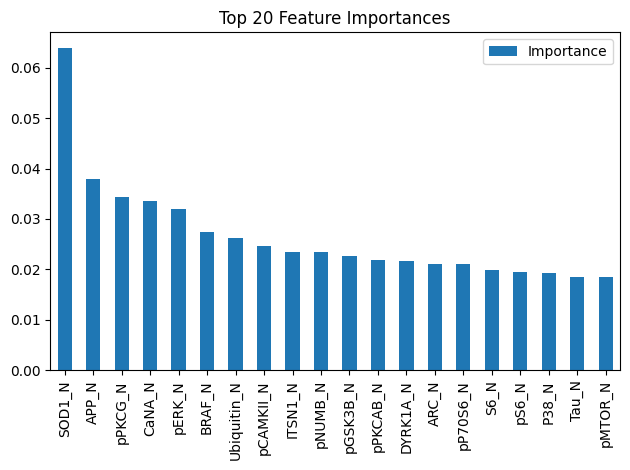

In [16]:
# Step 11: Feature Importance
importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
importances.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()